### Machine Learning Algoritm
- 지도학습
- 비지도학습
- 강화학습

지도 학습 Supervised Learning

### K-NN(K-Nearest Neighbor)

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier # classifier : 분류기


$$
     \begin{pmatrix}
     1&2 \\
     2&3\\
     3&4\\
     6&7\\
     7&8\\
     8&9\\
     \end{pmatrix}
$$

In [185]:
# x_train = np.array([
#      [1,2],
#      [2,3],
#      [3,4],
#      [6,7],
#      [7,8],
#      [8,9]
# ])
#  모델 훈련용 데이터
x_train = np.array([[i,i+1]for i in range(1,9) if i not in (4,5)])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [186]:
# 모델 테스트용 데이터
x_test = np.array([[6,5]])


In [187]:
# K-NN setting
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [188]:
# test
predicted_label = knn.predict(x_test)

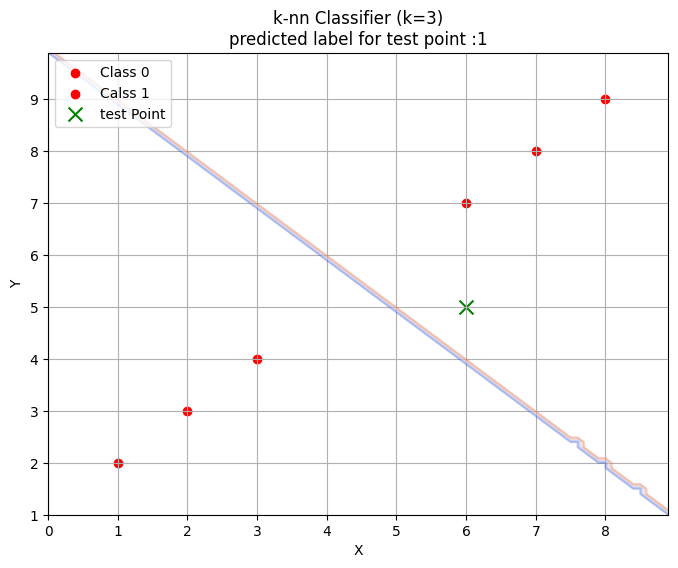

In [189]:
plt.figure(figsize=(8,6))
for i, point in enumerate(x_train):
     plt.scatter(point[0],point[1], c='r' if y_train[1]==0 else 'b', marker='o',
                    label='Class 0 ' if y_train[i] == 0 and i == 0 else 
                    ('Calss 1' if y_train[i]==1 and i ==3 else '') )
plt.scatter(x_test[0,0],x_test[0,1], c='g',marker='x',s=100,label="test Point")

x_min, x_max = x_train[:, 0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx,yy,Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"k-nn Classifier (k={k})\npredicted label for test point :{predicted_label[0]}")
plt.grid(True)
plt.show()


#### SVM(Support Vector Machine)

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [191]:
# 복잡한 샘플 생성
x_trian, y_train = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=2)

# 테스트 데이터
x_test = np.array([[0,0]])

In [192]:
svm_model = svm.SVC()
svm_model.fit(x_trian,y_train)

SVC()

In [193]:
# 예측
predicted_label = svm_model.predict(x_test)

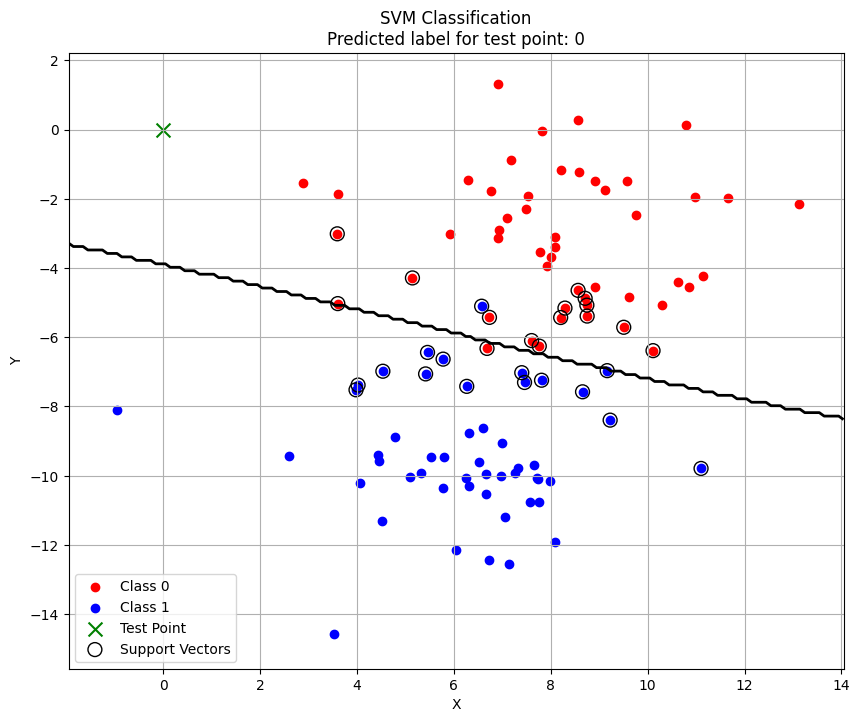

In [194]:

# 시각화
plt.figure(figsize=(10, 8))
for i, point in enumerate(x_trian):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))
plt.scatter(x_test[0, 0], x_test[0, 1], c='g', marker='x', s=100, label='Test Point')
x_min, x_max = x_trian[:, 0].min()-1, x_trian[:, 0].max()+1
y_min, y_max = x_trian[:, 1].min()-1, x_trian[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k',
            label='Support Vectors')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"SVM Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()


In [195]:
def scatter_vis(X_train, y_train, X_test, model, figsize=(6, 6),):
    """_summary_
    Args:
        X_train (_type_): 훈련 데이터 셋
        y_train (_type_): 훈련 데이터 레이블
        X_test (_type_): 테스트용 데이터
        model (_type_): 만든 머신러닝 모델 작성
        figsize (tuple, optional): Defaults to (6, 6).
    """
    plt.figure(figsize=figsize)
    for i, point in enumerate(X_train):
        plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                    label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))
    plt.scatter(X_test[0, 0], X_test[0, 1], c='g', marker='x', s=100, label='Test Point')
    x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
    y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

Decision Tree

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [197]:
# 복잡한 샘플 데이터 생성
x_train, y_train = make_classification(n_samples=200,n_features=2, n_informative=2, n_redundant=0,
                                       n_clusters_per_class=1, random_state=42)

# 테스트 데이터 
x_test = np.array([[0,0]])

In [198]:
#  DC tree 훈련
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [199]:
# 예측
predicted_label = tree_model.predict(x_test)

In [200]:
# 트리모델 시각화
# 시각화
plt.figure(figsize=(10, 8))
for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))
plt.scatter(x_test[0, 0], x_test[0, 1], c='g', marker='x', s=100, label='Test Point')
x_min, x_max = x_train[:, 0].min()-1, x_train[:, 0].max()+1
y_min, y_max = x_train[:, 1].min()-1, x_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contour(scatter_vis(x_train,x_test,y_train,tree_model) alpha=0.3, cmap=plt.cm.coolwarm)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"DC Tree Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3146032124.py, line 15)

[Text(0.45588235294117646, 0.9545454545454546, 'X <= -0.0\ngini = 0.5\nsamples = 200\nvalue = [100, 100]\nclass = Calss 0'),
 Text(0.22058823529411764, 0.8636363636363636, 'Y <= 0.569\ngini = 0.209\nsamples = 93\nvalue = [82, 11]\nclass = Calss 0'),
 Text(0.3382352941176471, 0.9090909090909092, 'True  '),
 Text(0.11764705882352941, 0.7727272727272727, 'Y <= 0.28\ngini = 0.369\nsamples = 41\nvalue = [31, 10]\nclass = Calss 0'),
 Text(0.058823529411764705, 0.6818181818181818, 'X <= -2.591\ngini = 0.231\nsamples = 30\nvalue = [26, 4]\nclass = Calss 0'),
 Text(0.029411764705882353, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Class 1'),
 Text(0.08823529411764706, 0.5909090909090909, 'X <= -1.196\ngini = 0.185\nsamples = 29\nvalue = [26, 3]\nclass = Calss 0'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Calss 0'),
 Text(0.11764705882352941, 0.5, 'X <= -1.137\ngini = 0.305\nsamples = 16\nvalue = [13, 3]\nclass = Calss 0'),
 Te

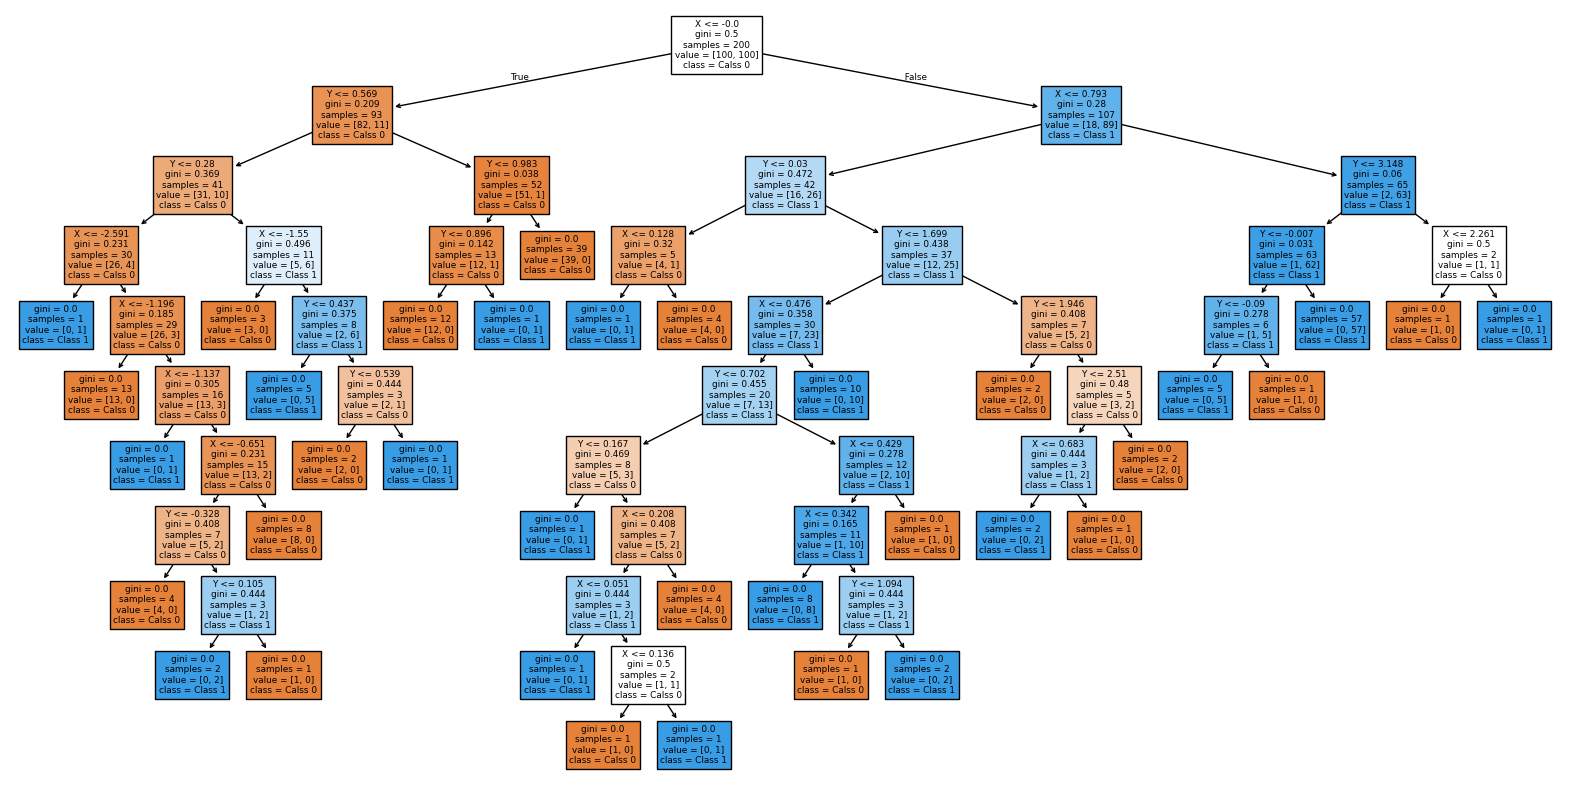

In [ ]:
# 의사결정나무 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree_model,filled=True,feature_names=['X','Y'],class_names=['Calss 0','Class 1'])

### 비지도 학습 Unsupervisied Learning

k-means clustering
- k: 군집(클러스터)의 개수

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [202]:
# 데이터 불러오기
iris = load_iris()
x= iris.data

In [203]:
# 데이터 전처리 - 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [206]:
# PCA(principle Component Analysis, 주성분분석)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [207]:
# 모델생성
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [211]:
labels = kmeans.labels_ #label이 아닌 cluster값

# 시각화
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

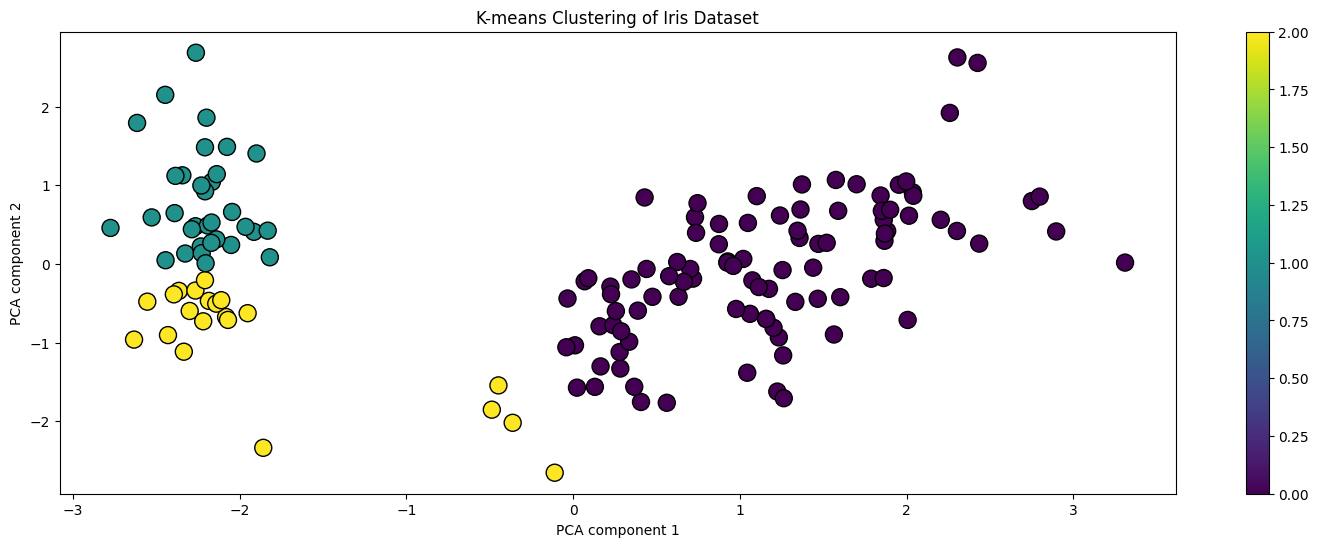

In [213]:
# 시각화
plt.figure(figsize=(18,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='viridis',edgecolors='k',s=150)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.colorbar()
plt.show()

In [214]:
# Random data 로 k=means clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

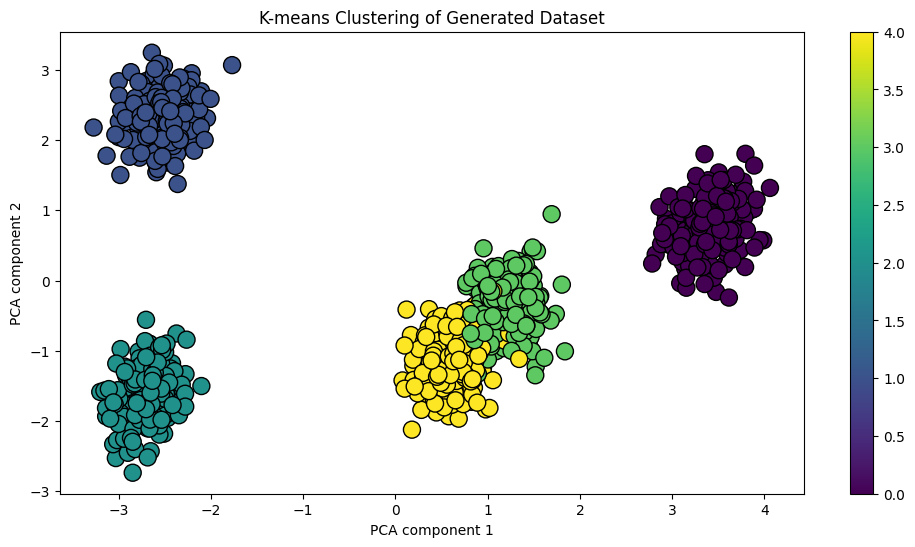

In [218]:
# 데이터 생성
n_samples = 1000
n_features = 10
n_cluster = 5
x,y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_cluster, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# K-means clustering
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(x_scaled)
labels = kmeans.labels_

# PCA
pca = PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

# 시각화
plt.figure(figsize=(12,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='viridis',edgecolors='k',s=150)
plt.title('K-means Clustering of Generated Dataset')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.colorbar()
plt.show()